In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt


Mounted at /content/drive


In [ ]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/stroke/imbalaced_stroke.csv')
data.head()

,stroke,gender,age,Race,Marital status,alcohol,smoke,sleep disorder,Health Insurance,General health condition,...,energy,protein,Carbohydrate,Dietary fiber,Total fat,Total saturated fatty acids,Total monounsaturated fatty acids,Total polyunsaturated fatty acids,Potassium,Sodium
0,0,2,2,5,1,0,0,2,2,3,...,1598,62.78,192.19,10.0,65.64,25.112,24.090,8.543,2887,2969
1,0,2,2,1,1,0,0,1,2,3,...,1547,45.35,256.02,17.0,42.56,13.423,15.389,10.613,2058,2091
2,1,1,2,3,1,1,1,2,1,3,...,2466,81.56,254.49,13.0,103.32,43.295,36.727,15.366,3117,5233
3,0,2,3,3,1,1,1,2,1,4,...,1605,70.99,143.37,10.0,81.60,24.527,30.567,18.174,1766,3706
4,0,1,1,4,1,0,0,2,1,2,...,1818,74.75,229.45,14.2,67.49,26.030,24.837,10.533,1842,2461


In [ ]:

# Split features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Display the encoded dataset
print(X)
print(y)


      gender  age  Race  Marital status  alcohol   smoke  sleep disorder  \
0          2    2     5               1         0      0               2   
1          2    2     1               1         0      0               1   
2          1    2     3               1         1      1               2   
3          2    3     3               1         1      1               2   
4          1    1     4               1         0      0               2   
...      ...  ...   ...             ...       ...    ...             ...   
4598       1    2     3               5         1      1               1   
4599       1    2     1               1         1      1               1   
4600       1    3     4               2         1      1               1   
4601       2    2     2               1         1      1               1   
4602       1    1     3               3         1      1               1   

      Health Insurance  General health condition  depression  ...  energy  \
0         

**CfssSubsetEval**

Feature Importance Scores (CfssSubsetEval with PCA mapped to original features):
Triglyceride                         0.009862
High-density lipoprotein             0.006467
Low-density lipoprotein              0.005977
Diastolic blood pressure             0.005834
sleep time                           0.004803
Systolic blood pressure              0.004467
Fasting Glucose                      0.003591
energy                               0.003562
Total saturated fatty acids          0.003344
Health Insurance                     0.003259
Minutes sedentary activity           0.003205
Total fat                            0.003175
hypertension                         0.003112
Total monounsaturated fatty acids    0.003033
Carbohydrate                         0.003022
Sodium                               0.002952
depression                           0.002850
protein                              0.002826
Glycohemoglobin                      0.002741
high cholesterol                     0.002511

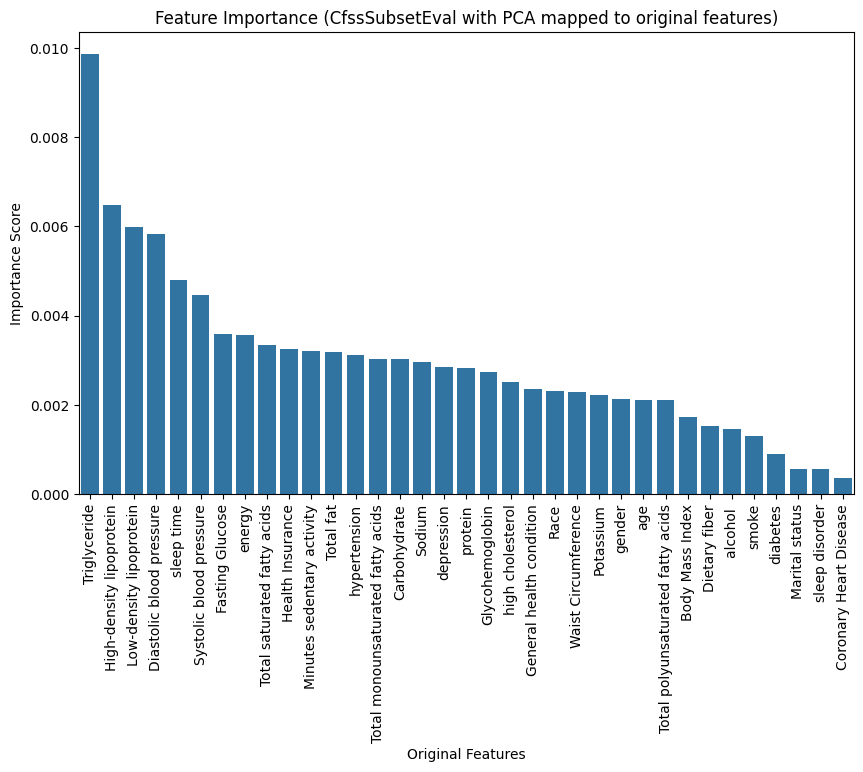

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/stroke/imbalaced_stroke.csv')

# Split features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Evaluate the importance of principal components using mutual information
mi = mutual_info_classif(X_pca, y)
pc_importance = pd.Series(mi, index=[f'PC{i+1}' for i in range(X_pca.shape[1])]).sort_values(ascending=False)

# Get the loadings (components)
loadings = pca.components_

# Calculate the importance of the original features
original_feature_importance = np.abs(np.dot(loadings.T, pc_importance.values))
original_feature_importance_series = pd.Series(original_feature_importance, index=X.columns).sort_values(ascending=False)

# Print the feature importance scores of the original features
print("Feature Importance Scores (CfssSubsetEval with PCA mapped to original features):")
print(original_feature_importance_series)

# Plot the feature importance of the original features
plt.figure(figsize=(10, 6))
sns.barplot(x=original_feature_importance_series.index, y=original_feature_importance_series.values)
plt.title('Feature Importance (CfssSubsetEval with PCA mapped to original features)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()


Feature Importance Scores (CfssSubsetEval with PCA mapped to original features):
Triglyceride                         0.007444
Diastolic blood pressure             0.005300
Low-density lipoprotein              0.005054
High-density lipoprotein             0.004650
Carbohydrate                         0.003467
Fasting Glucose                      0.003454
energy                               0.003253
Potassium                            0.003234
Dietary fiber                        0.003107
Glycohemoglobin                      0.002934
depression                           0.002877
Sodium                               0.002811
protein                              0.002767
high cholesterol                     0.002754
Systolic blood pressure              0.002733
age                                  0.002399
Total fat                            0.002326
Total monounsaturated fatty acids    0.002290
Total saturated fatty acids          0.002283
Waist Circumference                  0.002174

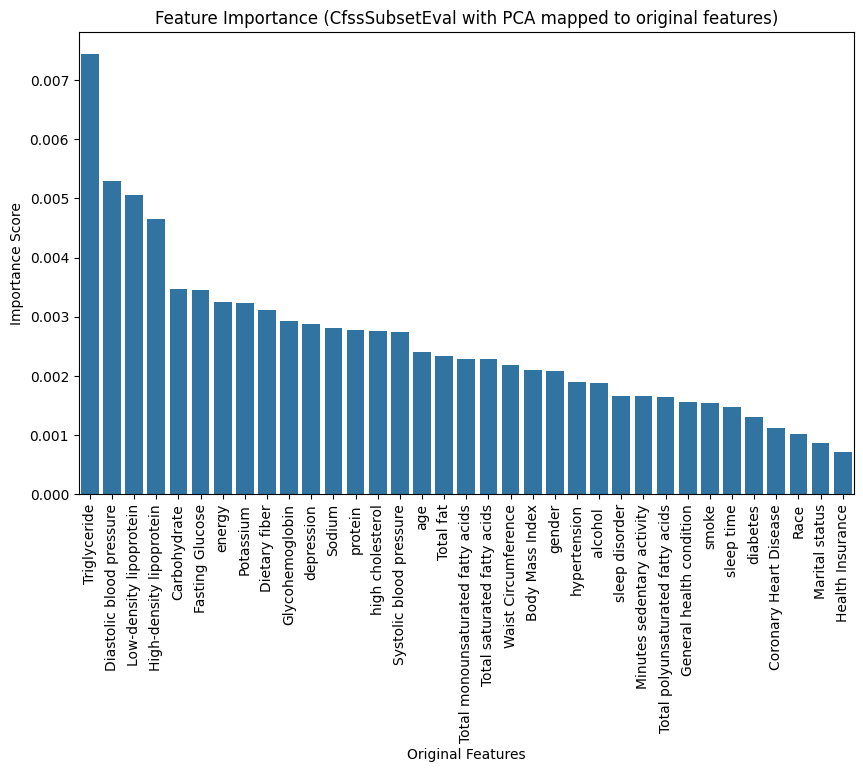


Selected Features (Threshold-Based Selection):
Triglyceride                0.007444
Diastolic blood pressure    0.005300
Low-density lipoprotein     0.005054
High-density lipoprotein    0.004650
Carbohydrate                0.003467
Fasting Glucose             0.003454
energy                      0.003253
Potassium                   0.003234
Dietary fiber               0.003107
dtype: float64

Selected Top-10 Features:
Triglyceride                0.007444
Diastolic blood pressure    0.005300
Low-density lipoprotein     0.005054
High-density lipoprotein    0.004650
Carbohydrate                0.003467
Fasting Glucose             0.003454
energy                      0.003253
Potassium                   0.003234
Dietary fiber               0.003107
Glycohemoglobin             0.002934
dtype: float64

Selected Features (Cumulative Importance up to 80.0%):
Triglyceride                         0.007444
Diastolic blood pressure             0.005300
Low-density lipoprotein              0.00505

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/stroke/imbalaced_stroke.csv')

# Split features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to hold feature importance scores across folds
importance_scores = np.zeros(X.shape[1])

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Apply PCA to retain 95% of the variance
    pca = PCA(n_components=0.95)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Evaluate the importance of principal components using mutual information
    mi = mutual_info_classif(X_train_pca, y_train)
    pc_importance = pd.Series(mi, index=[f'PC{i+1}' for i in range(X_train_pca.shape[1])]).sort_values(ascending=False)

    # Get the loadings (components)
    loadings = pca.components_

    # Calculate the importance of the original features
    original_feature_importance = np.abs(np.dot(loadings.T, pc_importance.values))
    importance_scores += original_feature_importance

# Average the importance scores across folds
importance_scores /= kf.n_splits
original_feature_importance_series = pd.Series(importance_scores, index=X.columns).sort_values(ascending=False)

# Print the feature importance scores of the original features
print("Feature Importance Scores (CfssSubsetEval with PCA mapped to original features):")
print(original_feature_importance_series)

# Plot the feature importance of the original features
plt.figure(figsize=(10, 6))
sns.barplot(x=original_feature_importance_series.index, y=original_feature_importance_series.values)
plt.title('Feature Importance (CfssSubsetEval with PCA mapped to original features)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

# Threshold-Based Selection
threshold = 0.003
selected_features_threshold = original_feature_importance_series[original_feature_importance_series > threshold]
print("\nSelected Features (Threshold-Based Selection):")
print(selected_features_threshold)

# Top-N Features Selection
top_n = 10
selected_features_top_n = original_feature_importance_series.head(top_n)
print(f"\nSelected Top-{top_n} Features:")
print(selected_features_top_n)

# Cumulative Importance Selection
cumulative_importance_threshold = 0.80
cumulative_importance = original_feature_importance_series.cumsum() / original_feature_importance_series.sum()
selected_features_cumulative = original_feature_importance_series[cumulative_importance <= cumulative_importance_threshold]
print(f"\nSelected Features (Cumulative Importance up to {cumulative_importance_threshold * 100}%):")
print(selected_features_cumulative)


Feature Importance Scores (CfssSubsetEval with PCA mapped to original features):
Triglyceride                         0.007444
Diastolic blood pressure             0.005300
Low-density lipoprotein              0.005054
High-density lipoprotein             0.004650
Carbohydrate                         0.003467
Fasting Glucose                      0.003454
energy                               0.003253
Potassium                            0.003234
Dietary fiber                        0.003107
Glycohemoglobin                      0.002934
depression                           0.002877
Sodium                               0.002811
protein                              0.002767
high cholesterol                     0.002754
Systolic blood pressure              0.002733
age                                  0.002399
Total fat                            0.002326
Total monounsaturated fatty acids    0.002290
Total saturated fatty acids          0.002283
Waist Circumference                  0.002174

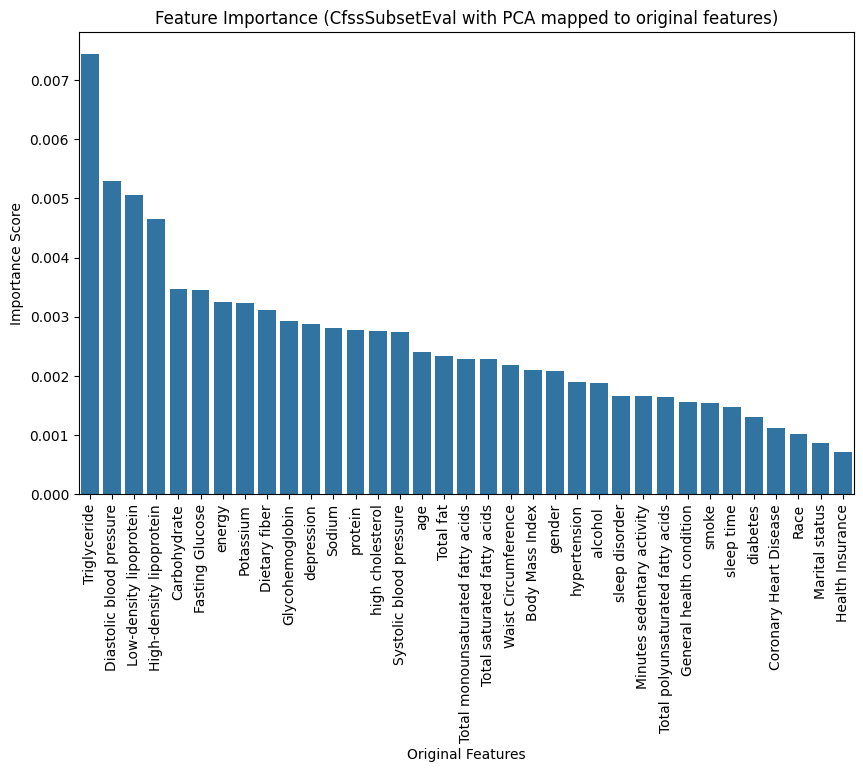


Selected Features (Threshold-Based Selection):
Triglyceride                         0.007444
Diastolic blood pressure             0.005300
Low-density lipoprotein              0.005054
High-density lipoprotein             0.004650
Carbohydrate                         0.003467
Fasting Glucose                      0.003454
energy                               0.003253
Potassium                            0.003234
Dietary fiber                        0.003107
Glycohemoglobin                      0.002934
depression                           0.002877
Sodium                               0.002811
protein                              0.002767
high cholesterol                     0.002754
Systolic blood pressure              0.002733
age                                  0.002399
Total fat                            0.002326
Total monounsaturated fatty acids    0.002290
Total saturated fatty acids          0.002283
Waist Circumference                  0.002174
Body Mass Index                 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/stroke/imbalaced_stroke.csv')

# Split features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to hold feature importance scores across folds
importance_scores = np.zeros(X.shape[1])

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Apply PCA to retain 95% of the variance
    pca = PCA(n_components=0.95)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Evaluate the importance of principal components using mutual information
    mi = mutual_info_classif(X_train_pca, y_train)
    pc_importance = pd.Series(mi, index=[f'PC{i+1}' for i in range(X_train_pca.shape[1])]).sort_values(ascending=False)

    # Get the loadings (components)
    loadings = pca.components_

    # Calculate the importance of the original features
    original_feature_importance = np.abs(np.dot(loadings.T, pc_importance.values))
    importance_scores += original_feature_importance

# Average the importance scores across folds
importance_scores /= kf.n_splits
original_feature_importance_series = pd.Series(importance_scores, index=X.columns).sort_values(ascending=False)

# Print the feature importance scores of the original features
print("Feature Importance Scores (CfssSubsetEval with PCA mapped to original features):")
print(original_feature_importance_series)

# Plot the feature importance of the original features
plt.figure(figsize=(10, 6))
sns.barplot(x=original_feature_importance_series.index, y=original_feature_importance_series.values)
plt.title('Feature Importance (CfssSubsetEval with PCA mapped to original features)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

# Threshold-Based Selection
threshold = 0.002
selected_features_threshold = original_feature_importance_series[original_feature_importance_series > threshold]
print("\nSelected Features (Threshold-Based Selection):")
print(selected_features_threshold)

# Top-N Features Selection
top_n = 10
selected_features_top_n = original_feature_importance_series.head(top_n)
print(f"\nSelected Top-{top_n} Features:")
print(selected_features_top_n)

# Cumulative Importance Selection
cumulative_importance_threshold = 0.90
cumulative_importance = original_feature_importance_series.cumsum() / original_feature_importance_series.sum()
selected_features_cumulative = original_feature_importance_series[cumulative_importance <= cumulative_importance_threshold]
print(f"\nSelected Features (Cumulative Importance up to {cumulative_importance_threshold * 100}%):")
print(selected_features_cumulative)


**GainRatioAttributeEval**

Feature Importance Scores (GainRatioAttributeEval with PCA mapped to original features):
diabetes                             0.264919
age                                  0.173789
Systolic blood pressure              0.134662
Diastolic blood pressure             0.114171
Low-density lipoprotein              0.101112
Carbohydrate                         0.093750
Glycohemoglobin                      0.063740
Fasting Glucose                      0.053703
gender                               0.051999
High-density lipoprotein             0.050937
energy                               0.050526
Total polyunsaturated fatty acids    0.047689
protein                              0.046298
Dietary fiber                        0.044156
smoke                                0.035988
Health Insurance                     0.035858
Body Mass Index                      0.032554
Total fat                            0.027065
Potassium                            0.026917
Race                                 

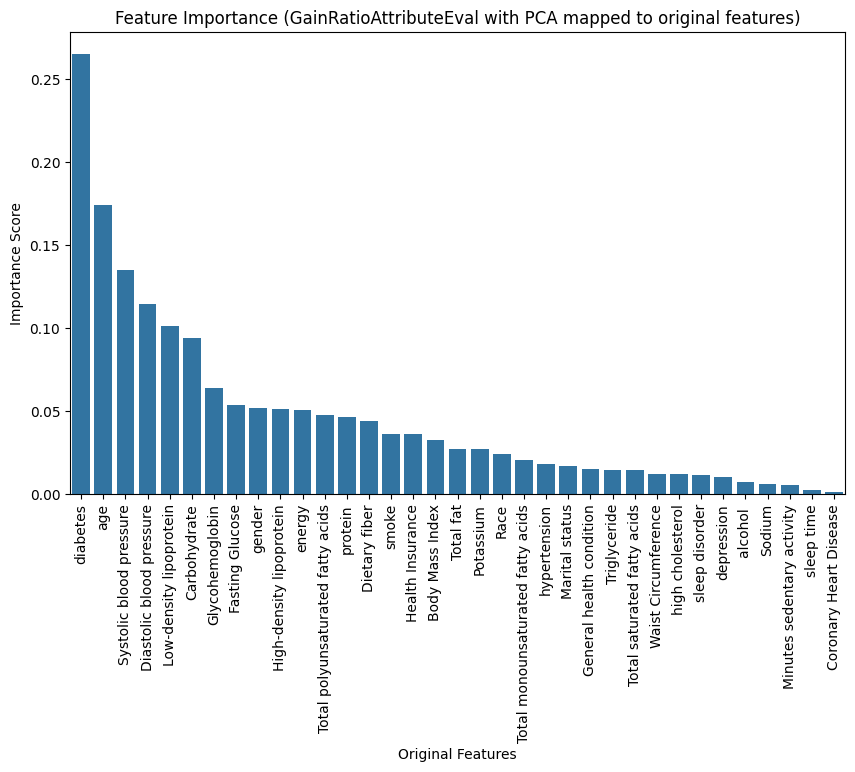

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/stroke/imbalaced_stroke.csv')

# Split features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Calculate Information Gain (mutual information) for principal components
ig = mutual_info_classif(X_pca, y)

# Calculate Intrinsic Value for each principal component
X_pca_abs = np.abs(X_pca)
intrinsic_value = -np.sum(X_pca_abs * np.log2(X_pca_abs + 1e-9), axis=0) / len(X_pca)

# Compute Gain Ratio for each principal component
gain_ratio = ig / (intrinsic_value + 1e-9)  # Adding a small constant to avoid division by zero
pc_importance = pd.Series(gain_ratio, index=[f'PC{i+1}' for i in range(X_pca.shape[1])]).sort_values(ascending=False)

# Get the loadings (components)
loadings = pca.components_

# Calculate the importance of the original features
original_feature_importance = np.abs(np.dot(loadings.T, pc_importance.values))
original_feature_importance_series = pd.Series(original_feature_importance, index=X.columns).sort_values(ascending=False)

# Print the feature importance scores of the original features
print("Feature Importance Scores (GainRatioAttributeEval with PCA mapped to original features):")
print(original_feature_importance_series)

# Plot the feature importance of the original features
plt.figure(figsize=(10, 6))
sns.barplot(x=original_feature_importance_series.index, y=original_feature_importance_series.values)
plt.title('Feature Importance (GainRatioAttributeEval with PCA mapped to original features)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()


Feature Importance Scores (GainRatioAttributeEval with PCA mapped to original features):
diabetes                             0.264919
age                                  0.173789
Systolic blood pressure              0.134662
Diastolic blood pressure             0.114171
Low-density lipoprotein              0.101112
Carbohydrate                         0.093750
Glycohemoglobin                      0.063740
Fasting Glucose                      0.053703
gender                               0.051999
High-density lipoprotein             0.050937
energy                               0.050526
Total polyunsaturated fatty acids    0.047689
protein                              0.046298
Dietary fiber                        0.044156
smoke                                0.035988
Health Insurance                     0.035858
Body Mass Index                      0.032554
Total fat                            0.027065
Potassium                            0.026917
Race                                 

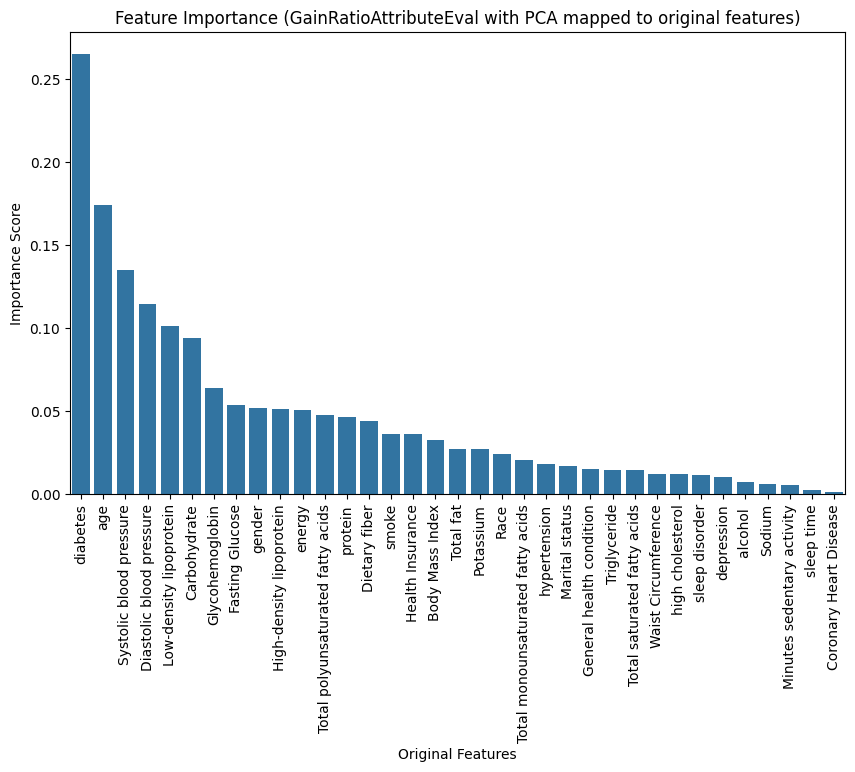


Cross-Validation Scores:
[0.65511713 0.6660232  0.66748514 0.68749181 0.67258746]

Selected Features (Threshold-Based Selection):
diabetes                             0.264919
age                                  0.173789
Systolic blood pressure              0.134662
Diastolic blood pressure             0.114171
Low-density lipoprotein              0.101112
Carbohydrate                         0.093750
Glycohemoglobin                      0.063740
Fasting Glucose                      0.053703
gender                               0.051999
High-density lipoprotein             0.050937
energy                               0.050526
Total polyunsaturated fatty acids    0.047689
protein                              0.046298
Dietary fiber                        0.044156
smoke                                0.035988
Health Insurance                     0.035858
Body Mass Index                      0.032554
Total fat                            0.027065
Potassium                            0.02

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/stroke/imbalaced_stroke.csv')

# Split features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Calculate Information Gain (mutual information) for principal components
ig = mutual_info_classif(X_pca, y)

# Calculate Intrinsic Value for each principal component
X_pca_abs = np.abs(X_pca)
intrinsic_value = -np.sum(X_pca_abs * np.log2(X_pca_abs + 1e-9), axis=0) / len(X_pca)

# Compute Gain Ratio for each principal component
gain_ratio = ig / (intrinsic_value + 1e-9)  # Adding a small constant to avoid division by zero
pc_importance = pd.Series(gain_ratio, index=[f'PC{i+1}' for i in range(X_pca.shape[1])]).sort_values(ascending=False)

# Get the loadings (components)
loadings = pca.components_

# Calculate the importance of the original features
original_feature_importance = np.abs(np.dot(loadings.T, pc_importance.values))
original_feature_importance_series = pd.Series(original_feature_importance, index=X.columns).sort_values(ascending=False)

# Print the feature importance scores of the original features
print("Feature Importance Scores (GainRatioAttributeEval with PCA mapped to original features):")
print(original_feature_importance_series)

# Plot the feature importance of the original features
plt.figure(figsize=(10, 6))
sns.barplot(x=original_feature_importance_series.index, y=original_feature_importance_series.values)
plt.title('Feature Importance (GainRatioAttributeEval with PCA mapped to original features)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

# Cross-validation for feature importance evaluation
model = RandomForestClassifier()  # You can use any classifier for cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='roc_auc')  # Using ROC AUC as the scoring metric

print("\nCross-Validation Scores:")
print(cv_scores)

# Threshold-Based Selection
threshold = 0.003
selected_features_threshold = original_feature_importance_series[original_feature_importance_series > threshold]
print("\nSelected Features (Threshold-Based Selection):")
print(selected_features_threshold)

# Top-N Features Selection
top_n = 10
selected_features_top_n = original_feature_importance_series.head(top_n)
print(f"\nSelected Top-{top_n} Features:")
print(selected_features_top_n)

# Cumulative Importance Selection
cumulative_importance_threshold = 0.80
cumulative_importance = original_feature_importance_series.cumsum() / original_feature_importance_series.sum()
selected_features_cumulative = original_feature_importance_series[cumulative_importance <= cumulative_importance_threshold]
print(f"\nSelected Features (Cumulative Importance up to {cumulative_importance_threshold * 100}%):")
print(selected_features_cumulative)


**ReliefFAttributeEval**

In [13]:
!pip install skrebate


  Preparing metadata (setup.py) ... done
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29255 sha256=b50902de0ce343c4005e02a5b2b4799ec592aa425ec58403f1e31659ed7b1f79
  Stored in directory: /root/.cache/pip/wheels/dd/67/40/683074a684607162bd0e34dcf7ccdfcab5861c3b2a83286f3a
Successfully built skrebate


Feature Importance Scores (ReliefFAttributeEval):
age                                  0.160070
General health condition             0.130176
Race                                 0.121660
Marital status                       0.118010
Body Mass Index                      0.103976
high cholesterol                     0.084488
smoke                                0.079209
gender                               0.067022
hypertension                         0.058310
sleep disorder                       0.057788
Systolic blood pressure              0.053434
Waist Circumference                  0.050019
diabetes                             0.049164
alcohol                              0.048599
Diastolic blood pressure             0.039656
Health Insurance                     0.038823
sleep time                           0.037768
depression                           0.037497
High-density lipoprotein             0.034062
Total saturated fatty acids          0.031528
Low-density lipoprotein       

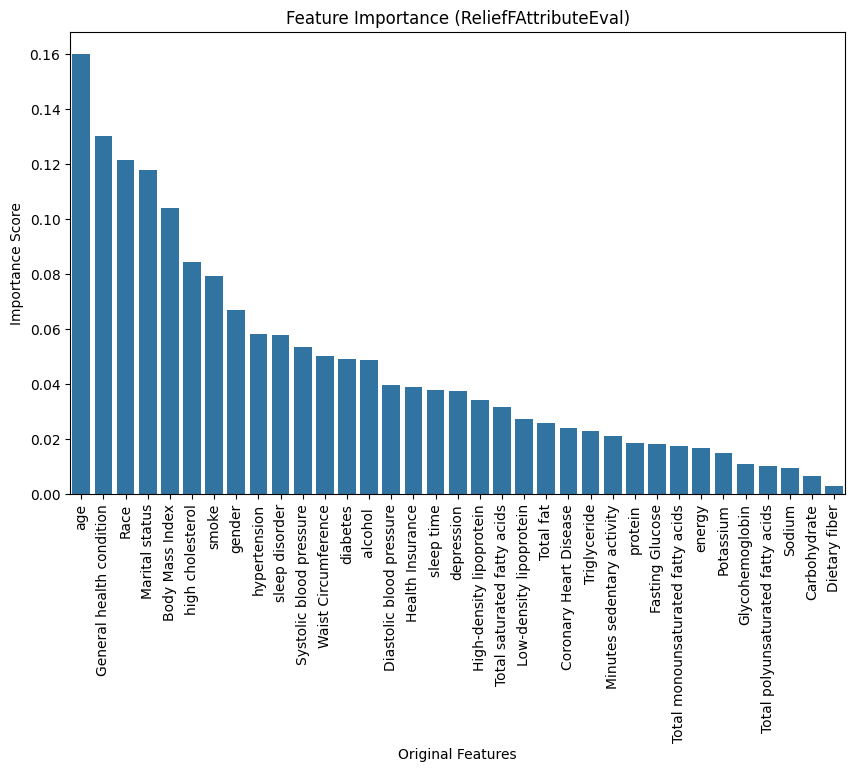

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from skrebate import ReliefF
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/stroke/imbalaced_stroke.csv')

# Split features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Evaluate the importance of original features using ReliefF
relief = ReliefF(n_neighbors=10, n_features_to_select=X.shape[1])
X_relief = relief.fit_transform(X.values, y.values)  # Transform X using ReliefF
feature_importances = relief.feature_importances_

# Print the feature importance scores of the original features
original_feature_importance_series = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)
print("Feature Importance Scores (ReliefFAttributeEval):")
print(original_feature_importance_series)

# Plot the feature importance of the original features
plt.figure(figsize=(10, 6))
sns.barplot(x=original_feature_importance_series.index, y=original_feature_importance_series.values)
plt.title('Feature Importance (ReliefFAttributeEval)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()


Feature Importance Scores (ReliefFAttributeEval):
age                                  0.160070
General health condition             0.130176
Race                                 0.121660
Marital status                       0.118010
Body Mass Index                      0.103976
high cholesterol                     0.084488
smoke                                0.079209
gender                               0.067022
hypertension                         0.058310
sleep disorder                       0.057788
Systolic blood pressure              0.053434
Waist Circumference                  0.050019
diabetes                             0.049164
alcohol                              0.048599
Diastolic blood pressure             0.039656
Health Insurance                     0.038823
sleep time                           0.037768
depression                           0.037497
High-density lipoprotein             0.034062
Total saturated fatty acids          0.031528
Low-density lipoprotein       

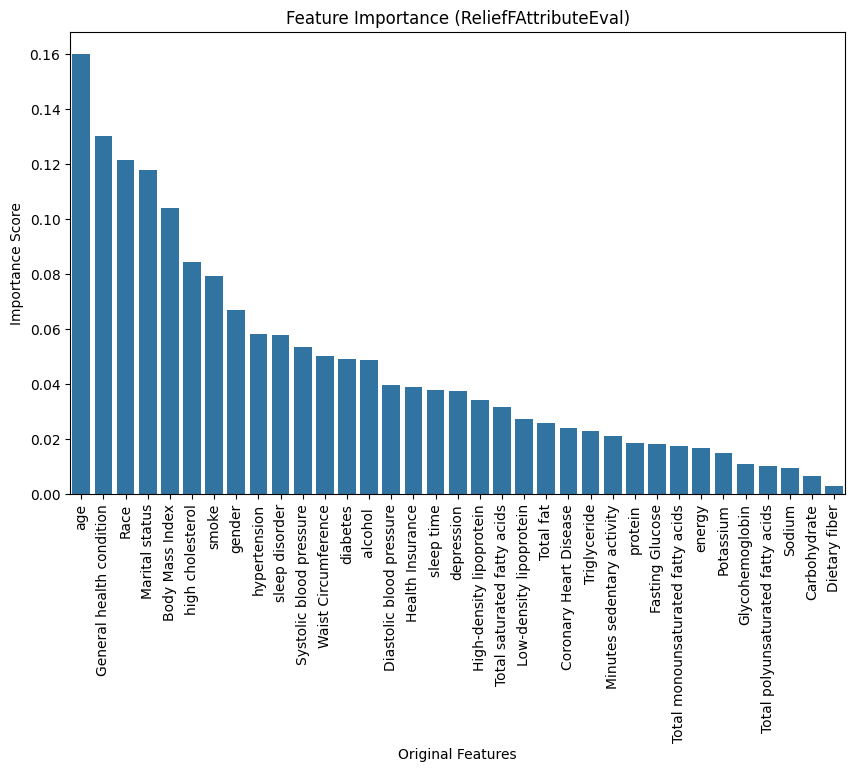


Cross-Validation Scores:
[0.63552709 0.63045199 0.66389086 0.67886039 0.66658477]

Selected Features (Threshold-Based Selection):
age                                  0.160070
General health condition             0.130176
Race                                 0.121660
Marital status                       0.118010
Body Mass Index                      0.103976
high cholesterol                     0.084488
smoke                                0.079209
gender                               0.067022
hypertension                         0.058310
sleep disorder                       0.057788
Systolic blood pressure              0.053434
Waist Circumference                  0.050019
diabetes                             0.049164
alcohol                              0.048599
Diastolic blood pressure             0.039656
Health Insurance                     0.038823
sleep time                           0.037768
depression                           0.037497
High-density lipoprotein             0.03

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from skrebate import ReliefF
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/stroke/imbalaced_stroke.csv')

# Split features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Evaluate the importance of original features using ReliefF
relief = ReliefF(n_neighbors=10, n_features_to_select=X.shape[1])
X_relief = relief.fit_transform(X.values, y.values)  # Transform X using ReliefF
feature_importances = relief.feature_importances_

# Print the feature importance scores of the original features
original_feature_importance_series = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)
print("Feature Importance Scores (ReliefFAttributeEval):")
print(original_feature_importance_series)

# Plot the feature importance of the original features
plt.figure(figsize=(10, 6))
sns.barplot(x=original_feature_importance_series.index, y=original_feature_importance_series.values)
plt.title('Feature Importance (ReliefFAttributeEval)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

# Cross-validation for feature importance evaluation
model = RandomForestClassifier()  # You can use any classifier for cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='roc_auc')  # Using ROC AUC as the scoring metric

print("\nCross-Validation Scores:")
print(cv_scores)

# Threshold-Based Selection
threshold = 0.003
selected_features_threshold = original_feature_importance_series[original_feature_importance_series > threshold]
print("\nSelected Features (Threshold-Based Selection):")
print(selected_features_threshold)

# Top-N Features Selection
top_n = 10
selected_features_top_n = original_feature_importance_series.head(top_n)
print(f"\nSelected Top-{top_n} Features:")
print(selected_features_top_n)

# Cumulative Importance Selection
cumulative_importance_threshold = 0.80
cumulative_importance = original_feature_importance_series.cumsum() / original_feature_importance_series.sum()
selected_features_cumulative = original_feature_importance_series[cumulative_importance <= cumulative_importance_threshold]
print(f"\nSelected Features (Cumulative Importance up to {cumulative_importance_threshold * 100}%):")
print(selected_features_cumulative)


**PCA-IG**

Feature Importance Scores (PCA-IG mapped to original features):
Triglyceride                         0.010233
alcohol                              0.007440
sleep time                           0.006402
hypertension                         0.005612
Health Insurance                     0.005487
smoke                                0.004884
Minutes sedentary activity           0.004542
Low-density lipoprotein              0.004531
Systolic blood pressure              0.004069
Dietary fiber                        0.003832
Coronary Heart Disease               0.003740
Race                                 0.003158
Carbohydrate                         0.002993
Diastolic blood pressure             0.002869
high cholesterol                     0.002629
High-density lipoprotein             0.002563
Marital status                       0.002261
Potassium                            0.001743
Total saturated fatty acids          0.001405
Waist Circumference                  0.001227
General health c

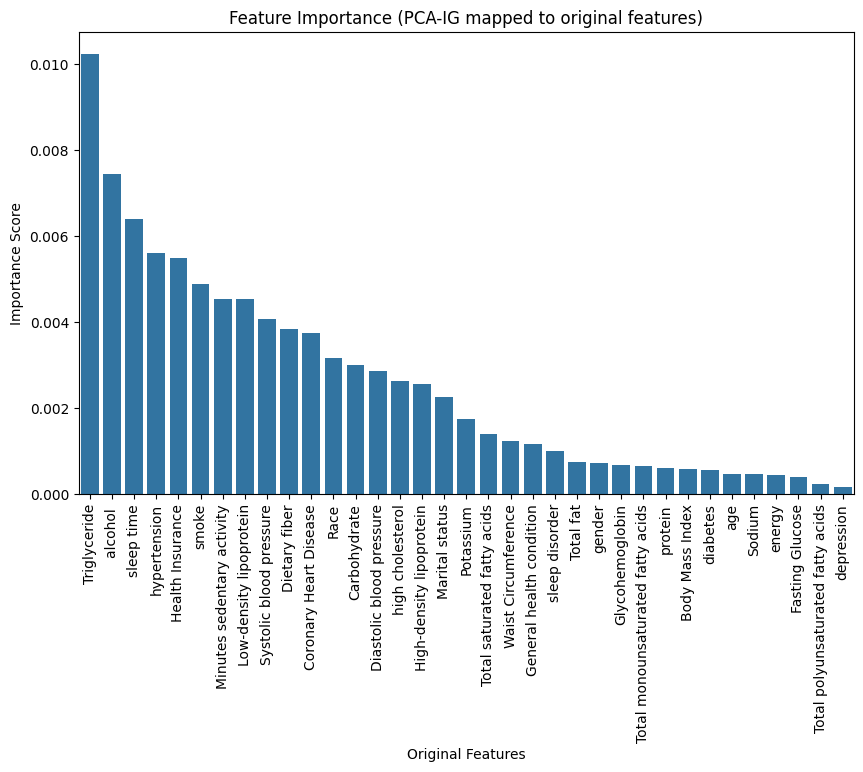

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/stroke/imbalaced_stroke.csv')

# Split features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Evaluate the importance of principal components using mutual information
mi = mutual_info_classif(X_pca, y)
pc_importance = pd.Series(mi, index=[f'PC{i+1}' for i in range(X_pca.shape[1])]).sort_values(ascending=False)

# Get the loadings (components)
loadings = pca.components_

# Calculate the importance of the original features using PCA-IG
pca_ig_importance = np.abs(np.dot(loadings.T, mi))
pca_ig_importance_series = pd.Series(pca_ig_importance, index=X.columns).sort_values(ascending=False)

# Print the feature importance scores using PCA-IG
print("Feature Importance Scores (PCA-IG mapped to original features):")
print(pca_ig_importance_series)

# Plot the feature importance using PCA-IG
plt.figure(figsize=(10, 6))
sns.barplot(x=pca_ig_importance_series.index, y=pca_ig_importance_series.values)
plt.title('Feature Importance (PCA-IG mapped to original features)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()


Feature Importance Scores (PCA-IG mapped to original features):
Triglyceride                         0.010233
alcohol                              0.007440
sleep time                           0.006402
hypertension                         0.005612
Health Insurance                     0.005487
smoke                                0.004884
Minutes sedentary activity           0.004542
Low-density lipoprotein              0.004531
Systolic blood pressure              0.004069
Dietary fiber                        0.003832
Coronary Heart Disease               0.003740
Race                                 0.003158
Carbohydrate                         0.002993
Diastolic blood pressure             0.002869
high cholesterol                     0.002629
High-density lipoprotein             0.002563
Marital status                       0.002261
Potassium                            0.001743
Total saturated fatty acids          0.001405
Waist Circumference                  0.001227
General health c

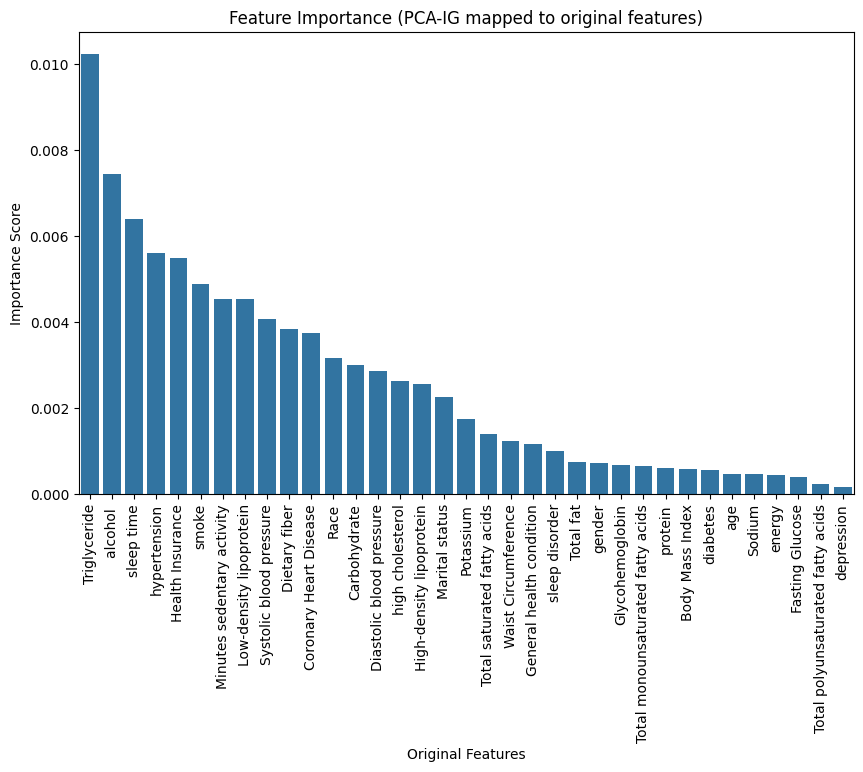


Selected Features (Threshold-Based Selection):
Triglyceride                  0.010233
alcohol                       0.007440
sleep time                    0.006402
hypertension                  0.005612
Health Insurance              0.005487
smoke                         0.004884
Minutes sedentary activity    0.004542
Low-density lipoprotein       0.004531
Systolic blood pressure       0.004069
Dietary fiber                 0.003832
Coronary Heart Disease        0.003740
Race                          0.003158
dtype: float64

Selected Top-10 Features:
Triglyceride                  0.010233
alcohol                       0.007440
sleep time                    0.006402
hypertension                  0.005612
Health Insurance              0.005487
smoke                         0.004884
Minutes sedentary activity    0.004542
Low-density lipoprotein       0.004531
Systolic blood pressure       0.004069
Dietary fiber                 0.003832
dtype: float64

Selected Features (Cumulative Import

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/stroke/imbalaced_stroke.csv')

# Split features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Evaluate the importance of principal components using mutual information
mi = mutual_info_classif(X_pca, y)
pc_importance = pd.Series(mi, index=[f'PC{i+1}' for i in range(X_pca.shape[1])]).sort_values(ascending=False)

# Get the loadings (components)
loadings = pca.components_

# Calculate the importance of the original features using PCA-IG
pca_ig_importance = np.abs(np.dot(loadings.T, mi))
pca_ig_importance_series = pd.Series(pca_ig_importance, index=X.columns).sort_values(ascending=False)

# Print the feature importance scores using PCA-IG
print("Feature Importance Scores (PCA-IG mapped to original features):")
print(pca_ig_importance_series)

# Plot the feature importance using PCA-IG
plt.figure(figsize=(10, 6))
sns.barplot(x=pca_ig_importance_series.index, y=pca_ig_importance_series.values)
plt.title('Feature Importance (PCA-IG mapped to original features)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

# Cross-validation for feature importance evaluation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Threshold-Based Selection
threshold = 0.003
original_feature_importance_series = pca_ig_importance_series  # Assuming you use pca_ig_importance_series
selected_features_threshold = original_feature_importance_series[original_feature_importance_series > threshold]
print("\nSelected Features (Threshold-Based Selection):")
print(selected_features_threshold)

# Top-N Features Selection
top_n = 10
selected_features_top_n = original_feature_importance_series.head(top_n)
print(f"\nSelected Top-{top_n} Features:")
print(selected_features_top_n)

# Cumulative Importance Selection
cumulative_importance_threshold = 0.80
cumulative_importance = original_feature_importance_series.cumsum() / original_feature_importance_series.sum()
selected_features_cumulative = original_feature_importance_series[cumulative_importance <= cumulative_importance_threshold]
print(f"\nSelected Features (Cumulative Importance up to {cumulative_importance_threshold * 100}%):")
print(selected_features_cumulative)

# Evaluate cross-validated feature importance for selected features
def evaluate_feature_importance_cv(X, y, cv):
    def cross_val_feature_importance(model, X, y, cv):
        scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        return np.mean(scores)

    # Example: Select top features based on some selection method (threshold, top_n, cumulative)
    selected_features = selected_features_threshold.index  # Replace with selected features based on method

    # Example: Evaluate feature importance using a classifier (e.g., RandomForestClassifier)
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(random_state=42)
    feature_importance_scores = {}

    for feature in selected_features:
        X_feature = X[feature].values.reshape(-1, 1)
        score = cross_val_feature_importance(model, X_feature, y, cv)
        feature_importance_scores[feature] = score

    return feature_importance_scores

# Example usage:
feature_importance_scores = evaluate_feature_importance_cv(X, y, cv)
print("\nCross-validated Feature Importance Scores:")
print(feature_importance_scores)


Feature Importance Scores (PCA-IG mapped to original features):
Triglyceride                         0.010233
alcohol                              0.007440
sleep time                           0.006402
hypertension                         0.005612
Health Insurance                     0.005487
smoke                                0.004884
Minutes sedentary activity           0.004542
Low-density lipoprotein              0.004531
Systolic blood pressure              0.004069
Dietary fiber                        0.003832
Coronary Heart Disease               0.003740
Race                                 0.003158
Carbohydrate                         0.002993
Diastolic blood pressure             0.002869
high cholesterol                     0.002629
High-density lipoprotein             0.002563
Marital status                       0.002261
Potassium                            0.001743
Total saturated fatty acids          0.001405
Waist Circumference                  0.001227
General health c

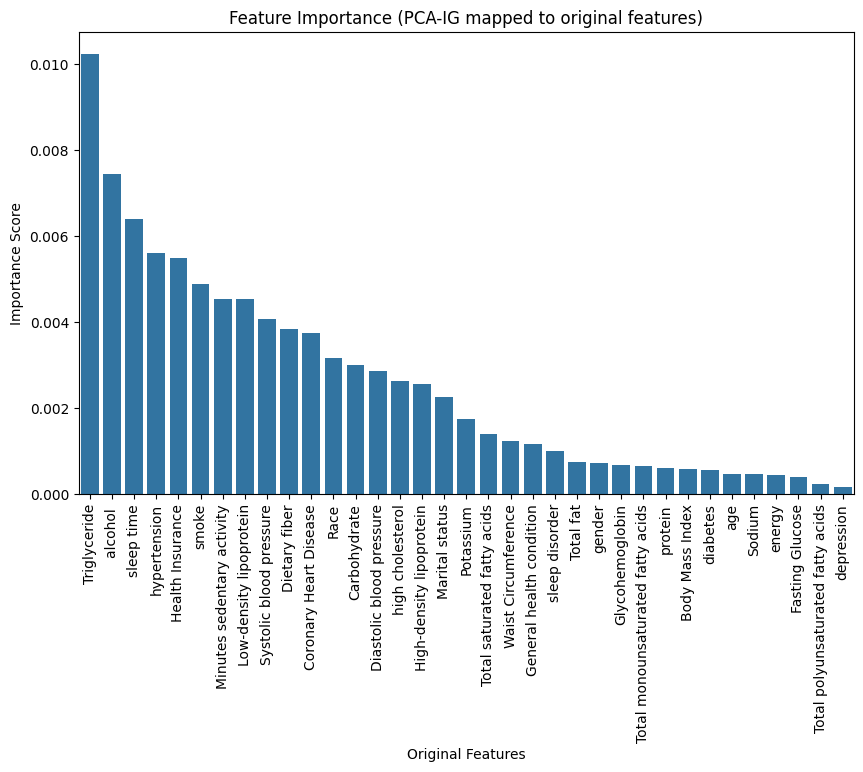


Selected Features (Threshold-Based Selection):
Triglyceride                  0.010233
alcohol                       0.007440
sleep time                    0.006402
hypertension                  0.005612
Health Insurance              0.005487
smoke                         0.004884
Minutes sedentary activity    0.004542
Low-density lipoprotein       0.004531
Systolic blood pressure       0.004069
Dietary fiber                 0.003832
Coronary Heart Disease        0.003740
Race                          0.003158
Carbohydrate                  0.002993
Diastolic blood pressure      0.002869
high cholesterol              0.002629
High-density lipoprotein      0.002563
Marital status                0.002261
dtype: float64

Selected Top-10 Features:
Triglyceride                  0.010233
alcohol                       0.007440
sleep time                    0.006402
hypertension                  0.005612
Health Insurance              0.005487
smoke                         0.004884
Minutes seden

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/stroke/imbalaced_stroke.csv')

# Split features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Evaluate the importance of principal components using mutual information
mi = mutual_info_classif(X_pca, y)
pc_importance = pd.Series(mi, index=[f'PC{i+1}' for i in range(X_pca.shape[1])]).sort_values(ascending=False)

# Get the loadings (components)
loadings = pca.components_

# Calculate the importance of the original features using PCA-IG
pca_ig_importance = np.abs(np.dot(loadings.T, mi))
pca_ig_importance_series = pd.Series(pca_ig_importance, index=X.columns).sort_values(ascending=False)

# Print the feature importance scores using PCA-IG
print("Feature Importance Scores (PCA-IG mapped to original features):")
print(pca_ig_importance_series)

# Plot the feature importance using PCA-IG
plt.figure(figsize=(10, 6))
sns.barplot(x=pca_ig_importance_series.index, y=pca_ig_importance_series.values)
plt.title('Feature Importance (PCA-IG mapped to original features)')
plt.xlabel('Original Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

# Cross-validation for feature importance evaluation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Threshold-Based Selection
threshold = 0.002
original_feature_importance_series = pca_ig_importance_series  # Assuming you use pca_ig_importance_series
selected_features_threshold = original_feature_importance_series[original_feature_importance_series > threshold]
print("\nSelected Features (Threshold-Based Selection):")
print(selected_features_threshold)

# Top-N Features Selection
top_n = 10
selected_features_top_n = original_feature_importance_series.head(top_n)
print(f"\nSelected Top-{top_n} Features:")
print(selected_features_top_n)

# Cumulative Importance Selection
cumulative_importance_threshold = 0.90
cumulative_importance = original_feature_importance_series.cumsum() / original_feature_importance_series.sum()
selected_features_cumulative = original_feature_importance_series[cumulative_importance <= cumulative_importance_threshold]
print(f"\nSelected Features (Cumulative Importance up to {cumulative_importance_threshold * 100}%):")
print(selected_features_cumulative)

# Evaluate cross-validated feature importance for selected features
def evaluate_feature_importance_cv(X, y, cv):
    def cross_val_feature_importance(model, X, y, cv):
        scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        return np.mean(scores)

    # Example: Select top features based on some selection method (threshold, top_n, cumulative)
    selected_features = selected_features_threshold.index  # Replace with selected features based on method

    # Example: Evaluate feature importance using a classifier (e.g., RandomForestClassifier)
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(random_state=42)
    feature_importance_scores = {}

    for feature in selected_features:
        X_feature = X[feature].values.reshape(-1, 1)
        score = cross_val_feature_importance(model, X_feature, y, cv)
        feature_importance_scores[feature] = score

    return feature_importance_scores

# Example usage:
feature_importance_scores = evaluate_feature_importance_cv(X, y, cv)
print("\nCross-validated Feature Importance Scores:")
print(feature_importance_scores)
